In [1]:
import statistics
import pickle
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

from python import *
from python.race_model.EloRaceModel import EloRaceModelGenerator, EloRaceModel
from randomRaceModel import F1RaceResultsGetter
from randomRaceModel import F1RaceRandomModel
from modelRaceFromQuali import F1RaceFromQualiModel

In [2]:
with open('data/raceSeasonsData.pickle', 'rb') as handle:
    seasonsData = pickle.load(handle)
    
with open('data/raceResultsData.pickle', 'rb') as handle:
    raceResultsData = pickle.load(handle)
    
with open('data/driversData.pickle', 'rb') as handle:
    driversData = pickle.load(handle)
    
with open('data/constructorsData.pickle', 'rb') as handle:
    constructorsData = pickle.load(handle)
    
with open('data/enginesData.pickle', 'rb') as handle:
    enginesData = pickle.load(handle)
    
with open('data/qualiResultsData.pickle', 'rb') as handle:
    qualiResultsData = pickle.load(handle)
    
resultsGetter = F1RaceResultsGetter(seasonsData, raceResultsData)
randomModel = F1RaceRandomModel(seasonsData, raceResultsData)
qualiResultsModel = F1RaceFromQualiModel(seasonsData, raceResultsData, qualiResultsData)
eloModel = EloRaceModelGenerator(seasonsData, raceResultsData, driversData, constructorsData, enginesData)

In [3]:
randomPredictions = randomModel.constructPredictions()
predictionsBasedOnQualiResults = qualiResultsModel.constructPredictions()
eloPredictions = eloModel.generatePredictions()
results = resultsGetter.constructRaceResults()

In [4]:
randomModelErrors = []
qualiModelErrors = []
eloModelErrors = []
for i, res in enumerate(results):
    randomErrs = []
    qualiErrs = []
    eloErrs = []
    for pos, driver_id in enumerate(results[i]):
        randomModel_pos = randomPredictions[i].index(driver_id)
        randomErrs.append(abs(pos - randomModel_pos))
        
        qualiModel_pos = predictionsBasedOnQualiResults[i].index(driver_id)
        qualiErrs.append(abs(pos - qualiModel_pos))
        
        eloModel_pos = eloPredictions[i].index(driver_id)
        eloErrs.append(abs(pos - eloModel_pos))
    randomModelErrors.append(sum(randomErrs))
    qualiModelErrors.append(sum(qualiErrs))
    eloModelErrors.append(sum(eloErrs))

print('Random model MAE: {}'.format(statistics.mean(randomModelErrors)))
print('Random model MedianAE: {}'.format(statistics.median(randomModelErrors)))

print('Quali position model MAE: {}'.format(statistics.mean(qualiModelErrors)))
print('Quali position model MedianAE: {}'.format(statistics.median(qualiModelErrors)))

print('Elo model MAE: {}'.format(statistics.mean(eloModelErrors)))
print('Elo model MedianAE: {}'.format(statistics.median(eloModelErrors)))


Random model MAE: 152.3827160493827
Random model MedianAE: 147.0
Quali position model MAE: 82.5679012345679
Quali position model MedianAE: 80.0
Elo model MAE: 81.4074074074074
Elo model MedianAE: 80.0


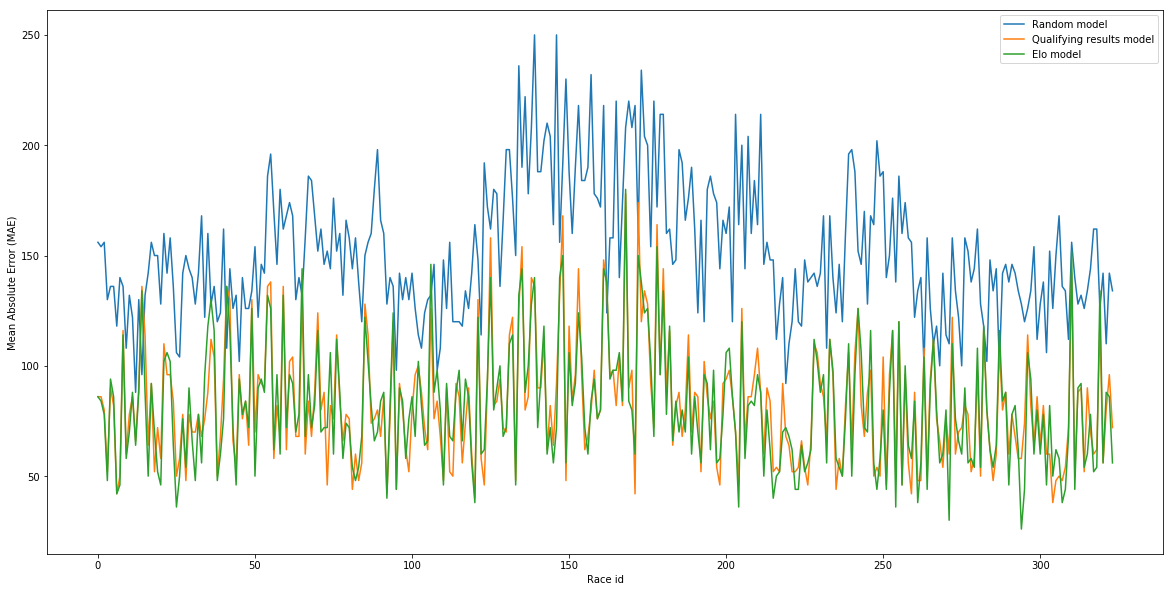

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel('Race id')
plt.ylabel('Mean Absolute Error (MAE)')
plt.plot(randomModelErrors)
plt.plot(qualiModelErrors)
plt.plot(eloModelErrors)
plt.legend(["Random model", "Qualifying results model", "Elo model"])
plt.show()